# Projeto 1

## <font color='red'>Patrick Serrano Wiegerinck</font>

___
## <font color='blue'>TÍTULO DO SEU PROJETO</font>

___
## Introdução

O trabalho a seguir apresentará uma comparação entre duas classes de indivíduos: a população de aposentados e a população economicamente ativa (PEA). Essa análise não será restringida apenas à análise geral dos dois grupos, uma vez que esses também foram divididos em subcategorias, como unidade de federação, sexo, idade, estado civil e renda dos dois grupos.

Para que a análise seja completa todas essas variáveis serão estudadas em particular e, posteriormente, serão comparadas e cruzadas de forma a apresentar um estudo mais claro dos dados e facilitar a formação de uma conclusão. O principal motivo pela escolha desses dois grupos se deu pelo fato dos dois representarem realidades muito diferentes de vida em geral, por exemplo, enquanto um depende de um subsídio do Estado o outro, de um salário.

Em relação a variável sexo e idade serão analisadas, respectivamente, a proporção entre os sexos tanto no grupo de aposentados, quanto no da PEA e a densidade de cada grupo por faixa de idade. Além disso será analisado o crescimento das populações de aposentados e da PEA, o crescimento da renda de cada grupo e a proporção por estado civil, por região e no país.

Para uma melhor análise do trabalho será utilizada uma pesquisa do IBGE de 2002, com isso será possível visualisar se as previsões feitas estavam corretas, além de visualisar a estratégia de estudo tanto da pesquisa, quanto do trabalho, uma vez que ambos apresentarão pontos negativos e positivos.

Segue o link da pesquisa do IBGE:
http://www.ibge.gov.br/home/presidencia/noticias/25072002pidoso.shtm

___
## Análise e Resultados

In [1]:
# importando ferramentas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Patrick Wiegerinck\Documents\2 Semestre\Ciência dos Dados\Projeto 1


##### Leitura da base já em formato de DataFrame e extensão .csv

In [3]:
info11 = pd.read_csv('PES2011.csv', sep=",")

In [4]:
info14 = pd.read_csv('PES2014.csv', sep=",")

In [175]:
info14.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2014,11,15,1,1,2,19,8,1987,...,3,500,3,3,1,2,2,1,500,20160623
1,1,2014,11,15,1,2,4,19,1,1986,...,3,500,3,4,2,NaN,2,1,500,20160623
2,2,2014,11,15,1,3,2,14,5,2013,...,3,500,3,1,NaN,NaN,NaN,NaN,500,20160623
3,3,2014,11,15,2,1,2,8,4,1963,...,2,1150,4,2,1,2,2,1,1150,20160623
4,4,2014,11,15,2,2,4,6,11,1970,...,2,1150,4,3,1,2,2,1,1150,20160623


In [176]:
info11.head()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2011,11,11000000,1,1,2,25,12,1961,49,...,4,1.000000e+12,99,2,1,2,2,1,1.000000e+12,20100000
1,2011,11,11000000,1,2,4,1,4,1978,33,...,4,1.000000e+12,99,6,2,NaN,NaN,2,1.000000e+12,20100000
2,2011,11,11000000,1,3,4,15,6,1996,15,...,4,1.000000e+12,99,3,2,NaN,NaN,2,1.000000e+12,20100000
3,2011,11,11000000,1,4,2,3,12,2001,9,...,4,1.000000e+12,99,2,2,NaN,NaN,2,1.000000e+12,20100000
4,2011,11,11000000,2,1,4,16,10,1959,51,...,4,1.461000e+03,5,4,1,2,2,1,1.461000e+03,20100000


____
## 1) Unidade de federação

Essa variável será utilizada para facilitar a análise das seguintes variáveis, sendo elas qualitativas ou quantitativas, de forma a criar subcategorias com a análise cruzada de todas as variáveis que serão utilizadas.

#### PNAD 2014

In [5]:
# Criando uma categoria por região do Brasil (Norte, Nordeste, Centro-Oeste, Sudeste e Sul)

r14 = pd.DataFrame()
r14["regiao"] = info14.UF

r14.regiao[(info14.UF >= 10) & (info14.UF < 20)]=1
r14.regiao[(info14.UF >= 20) & (info14.UF < 30)]=2
r14.regiao[(info14.UF >= 30) & (info14.UF < 40)]=3
r14.regiao[(info14.UF >= 40) & (info14.UF < 50)]=4
r14.regiao[(info14.UF >= 50) & (info14.UF < 60)]=5

r14.regiao.value_counts()
r14.regiao = r14.regiao.astype("category")
r14.regiao.cat.categories = ("NORTE","NORDESTE","SUDESTE","SUL","CENTRO-OESTE")

Anáise univariada da variável qualitativa UNIDADE DE FEDERAÇÃO

In [6]:
print('Frequências relativas por REGIÃO:')
freg14 = (r14.regiao.value_counts(True)*100).round(decimals=1)
print(freg14,'\n')

Frequências relativas por REGIÃO:
SUDESTE         29.4
NORDESTE        28.9
NORTE           16.0
SUL             15.3
CENTRO-OESTE    10.4
dtype: float64 



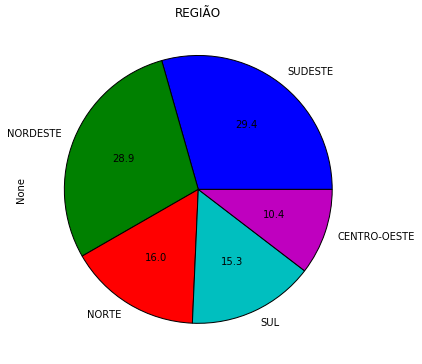

In [7]:
# Gráfico de pizza sobre a frequência relativa por REGIÃO

plot = freg14.plot(kind='pie',title='REGIÃO',autopct='%.1f',figsize=(6, 6))

#### PNAD 2011

In [8]:
# Criando uma categoria por região do Brasil (Norte, Nordeste, Centro-Oeste, Sudeste e Sul)

r11 = pd.DataFrame()
r11["regiao"] = info11.UF

r11.regiao[(info11.UF >= 10) & (info11.UF < 20)]=1
r11.regiao[(info11.UF >= 20) & (info11.UF < 30)]=2
r11.regiao[(info11.UF >= 30) & (info11.UF < 40)]=3
r11.regiao[(info11.UF >= 40) & (info11.UF < 50)]=4
r11.regiao[(info11.UF >= 50) & (info11.UF < 60)]=5

r11.regiao.value_counts()
r11.regiao = r11.regiao.astype("category")
r11.regiao.cat.categories = ("NORTE","NORDESTE","SUDESTE","SUL","CENTRO-OESTE")

Anáise univariada da variável qualitativa UNIDADE DE FEDERAÇÃO

In [9]:
print('Frequências relativas por REGIÃO:')
freg11 = (r11.regiao.value_counts(True)*100).round(decimals=1)
print(freg11,'\n')

Frequências relativas por REGIÃO:
NORDESTE        29.4
SUDESTE         28.5
NORTE           16.0
SUL             15.6
CENTRO-OESTE    10.4
dtype: float64 



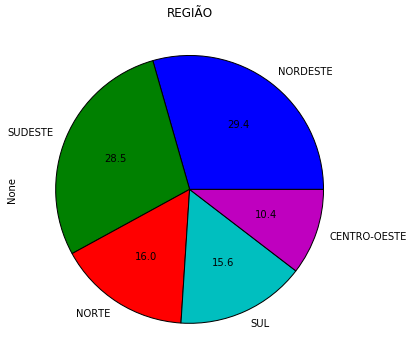

In [10]:
# Gráfico de pizza sobre a frequência relativa por REGIÃO

plot = freg11.plot(kind='pie',title='REGIÃO',autopct='%.1f',figsize=(6, 6))

____
## 2) Sexo

A variável "sexo" será utilizada na análise das classes de indivíduos que serão analisadas ao longo do trabalho: Aposentados e população economicamente ativa. Será realizada uma análise em que o sexo irá dividir as variáveis em subcategorias facilitando a análise em crosstab.

#### PNAD 2014

In [11]:
# Definindo a variável qualitativa SEXO

info14.V0302.value_counts()
info14.SEXO = info14.V0302.astype("category")
info14.SEXO.cat.categories = ("Masculino","Feminino")

Análise univariada da variável qualitativa SEXO

In [12]:
print('Frequências relativas por SEXO:')
fs14 = (info14.SEXO.value_counts(True)*100).round(decimals=1)
print(fs14,'\n')

Frequências relativas por SEXO:
Feminino     51.5
Masculino    48.5
dtype: float64 



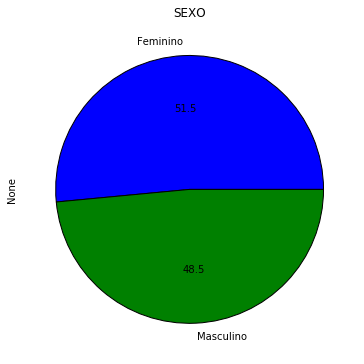

In [13]:
# Gráfico de pizza sobre a frequência relativa por SEXO

plot = fs14.plot(kind='pie',title='SEXO',autopct='%.1f',figsize=(6, 6))

#### PNAD 2011

In [14]:
# Definindo a variável qualitativa SEXO

info11.V0302.value_counts()
info11.SEXO = info11.V0302.astype("category")
info11.SEXO.cat.categories = ("Masculino","Feminino")

Análise univariada da variável qualitativa SEXO

In [15]:
print('Frequências relativas por SEXO:')
fs11 = (info11.SEXO.value_counts(True)*100).round(decimals=1)
print(fs11,'\n')

Frequências relativas por SEXO:
Feminino     51.5
Masculino    48.5
dtype: float64 



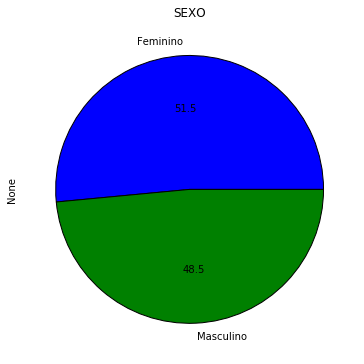

In [16]:
# Gráfico de pizza sobre a frequência relativa por SEXO

plot = fs11.plot(kind='pie',title='SEXO',autopct='%.1f',figsize=(6, 6))

____
## 3) Idade

A variável "idade" será utilizada para analisar a relação entre idade e quantidade de indivíduos por classe de pessoas: aposentados e PEA.

#### PNAD 2014

In [17]:
# Definindo a variável quantitativa IDADE

info14.V8005.value_counts()
info14.IDADE = info14[~info14.V8005.isnull()].V8005.astype("float")

In [18]:
# Descrição da variável quantitativa IDADE

info14.IDADE.describe()

count    362627.000000
mean         33.554051
std          21.017324
min           0.000000
25%          16.000000
50%          32.000000
75%          49.000000
max         120.000000
Name: V8005, dtype: float64

In [19]:
# Criação da faixa da variável quantitativa IDADE

faixa1 = np.arange(0,123,3)
#var = pd.cut(info14.IDADE,faixa1)
#var.value_counts()

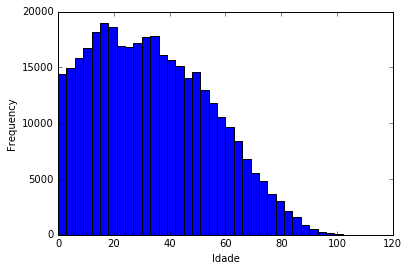

In [20]:
# Histograma da variável quantitativa IDADE no Brasil

plot = info14.IDADE.plot.hist(bins=faixa1)
plt.xlabel("Idade")

#### PNAD 2011

In [21]:
# Definindo a variável quantitativa IDADE

info11.V8005.value_counts()
info11.IDADE = info11[~info11.V8005.isnull()].V8005.astype("float")

In [22]:
# Descrição da variável quantitativa IDADE

info11.IDADE.describe()

count    358919.000000
mean         32.223613
std          20.642626
min           0.000000
25%          15.000000
50%          30.000000
75%          47.000000
max         111.000000
Name: V8005, dtype: float64

In [23]:
# Criação da faixa da variável quantitativa IDADE

faixa2 = np.arange(0,115,3)
#var = pd.cut(info11.IDADE,faixa2)
#var.value_counts()

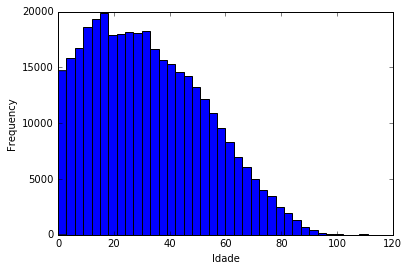

In [24]:
# Histograma da variável quantitativa IDADE no Brasil

plot = info11.IDADE.plot.hist(bins=faixa2)
plt.xlabel("Idade")

#### Comparação entre 2011 e 2014

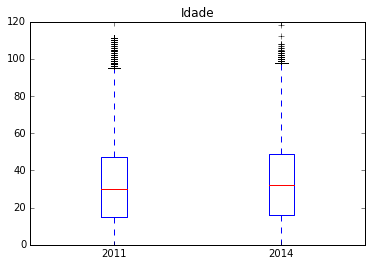

In [25]:
a0=pd.DataFrame([info11.IDADE,info14.IDADE],index=('2011','2014'))
a0=a0.T
a0.plot.box()
plt.title("Idade")

____
## 4) Estado civil

A variável "estado civil" será utilizada para determinar a relação entre o estado civil de cada indivíduo e seu pertencimento em sua classe específica de pessoas: aposentados e PEA.

#### PNAD 2014

In [26]:
# Definindo a variável qualitativa ESTADO CIVIL

info14.V4011.value_counts()
info14.EC = info14.V4011.astype("category")
info14.EC.cat.categories = ("Solteiro","Casado","Desquitado","Divorciado","Viúvo")

Análise univariada da variável qualitativa ESTADO CIVIL

In [27]:
print('Frequências relativas por ESTADO CIVIL:')
fec14 = (info14.EC.value_counts(True)*100).round(decimals=1)
print(fec14,'\n')

Frequências relativas por ESTADO CIVIL:
Solteiro      47.7
Viúvo          4.7
Divorciado     3.6
Casado         3.2
Desquitado     1.1
dtype: float64 



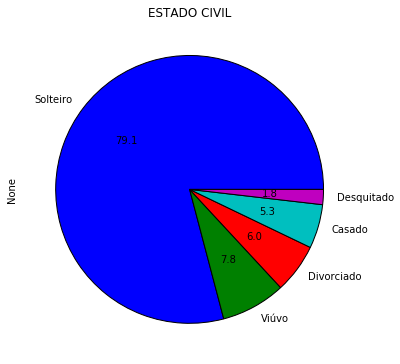

In [28]:
# Gráfico de pizza sobre a frequência relativa por ESTADO CIVIL

plot = fec14.plot(kind='pie',title='ESTADO CIVIL',autopct='%.1f',figsize=(6, 6))

#### PNAD 2011

In [29]:
# Definindo a variável qualitativa ESTADO CIVIL

info11.V4011.value_counts()
info11.EC = info11.V4011.astype("category")
info11.EC.cat.categories = ("Solteiro","Casado","Desquitado","Divorciado","Viúvo")

Análise univariada da variável qualitativa ESTADO CIVIL

In [30]:
print('Frequências relativas por ESTADO CIVIL:')
fec11 = (info11.EC.value_counts(True)*100).round(decimals=1)
print(fec11,'\n')

Frequências relativas por ESTADO CIVIL:
Solteiro      47.2
Viúvo          4.5
Casado         3.6
Divorciado     2.9
Desquitado     1.5
dtype: float64 



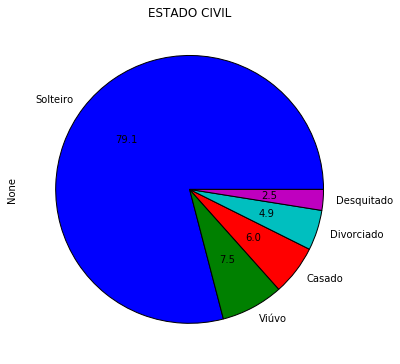

In [31]:
# Gráfico de pizza sobre a frequência relativa por ESTADO CIVIL

plot = fec11.plot(kind='pie',title='ESTADO CIVIL',autopct='%.1f',figsize=(6, 6))

____
## 5) Indivíduos Aposentados

A variável "indivíduos aposentados" representa uma das classes que serão analisadas ao longo do trabalho.

#### PNAD 2014

In [32]:
# Definindo a variável qualitativa APOSENTADOS

info14.V9122.value_counts()
info14.AP = info14.V9122.astype("category")
info14.AP.cat.categories = ("Sim","Não")

Análise univariada da variável qualitativa APOSENTADOS

In [33]:
print('Frequências relativas por APOSENTADOS:')
fap14 = (info14.AP.value_counts(True)*100).round(decimals=1)
print(fap14,'\n')

Frequências relativas por APOSENTADOS:
Não    75.3
Sim    10.7
dtype: float64 



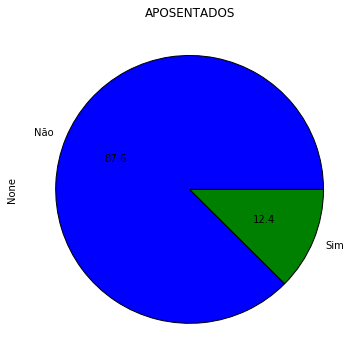

In [34]:
# Gráfico de pizza sobre a frequência relativa por APOSENTADOS

plot = fap14.plot(kind='pie',title='APOSENTADOS',autopct='%.1f',figsize=(6, 6))

#### PNAD 2011

In [35]:
# Definindo a variável qualitativa APOSENTADOS

info11.V9122.value_counts()
info11.AP = info11.V9122.astype("category")
info11.AP.cat.categories = ("Sim","Não")

Análise univariada da variável qualitativa APOSENTADOS

In [36]:
print('Frequências relativas por APOSENTADOS:')
fap11 = (info11.AP.value_counts(True)*100).round(decimals=1)
print(fap11,'\n')

Frequências relativas por APOSENTADOS:
Não    75.5
Sim     9.7
dtype: float64 



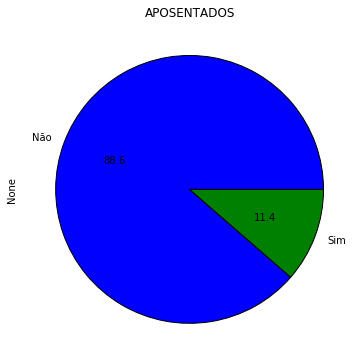

In [37]:
# Gráfico de pizza sobre a frequência relativa por APOSENTADOS

plot = fap11.plot(kind='pie',title='APOSENTADOS',autopct='%.1f',figsize=(6, 6))

Segundo a pesquisa do IBGE a população de idosos representaria cerca de 13% da população brasileira em 20202. Como se pode perceber pelos gráficos de pizza tanto de 2011, quanto de 2014 a população de idosos já representa mais de 12% da população brasileira em 2014, 14 anos após a pesquisa. Em suma, pode-se concluir que a pesquisa teve êxito em uma afirmação, porém em outra não teve: acertou que a frequência de aposentados iria aumentar nos seguintes anos, porém não foi capaz de prever uma taxa de crescimento condizente com a realidade, visto que o limite de 13% foi quase alcançado em 14 anos, a população de aposentados cresceu em 1% de 2011 para 2014.

____
## 6) Rendimento mensal da aposentadoria

A variável "rendimento mensal da aposentadoria" representa a renda adquirida pelos "indivíduos aposentados" pelo INSS e será utilizada para fazer analogia com rendas ganhas pela classe da PEA.

#### PNAD 2014

In [208]:
# Definindo a variável quantitativa RENDIMENTO DA APOSENTADORIA

info14.V1252.value_counts()
info14.RAP = info14[(info14.V1252!=999999999999)&(~info14.V1252.isnull())].V1252.astype("float")
info14_RAP = info14[(info14.V1252!=999999999999)&(~info14.V1252.isnull())]

In [45]:
# Descrição da variável quantitativa RENDIMENTO DA APOSENTADORIA

info14.RAP.describe()

count    38020.000000
mean      1368.243766
std       1781.906239
min        610.000000
25%        724.000000
50%        724.000000
75%       1300.000000
max      36000.000000
Name: V1252, dtype: float64

In [46]:
# Criação da faixa da variável quantitativa RENDIMENTO DA APOSENTADORIA

faixa3 = np.arange(0,40000,750)
#var3 = pd.cut(info14.RAP,faixa3)
#var3.value_counts()

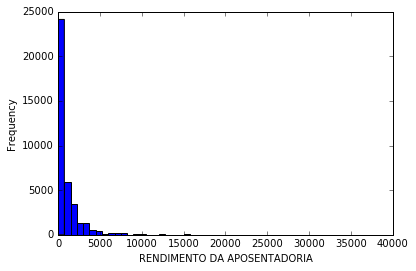

In [47]:
# Histograma da variável quantitativa RENDIMENTO DA APOSENTADORIA no Brasil

plot = info14.RAP.plot.hist(bins=faixa3)
plt.xlabel("RENDIMENTO DA APOSENTADORIA")

#### PNAD 2011

In [209]:
# Definindo a variável quantitativa RENDIMENTO DA APOSENTADORIA

info11.V1252.value_counts()
info11.RAP = info11[(info11.V1252<=500000)&(~info11.V1252.isnull())].V1252.astype("float")
info11_RAP = info11[(info11.V1252<=500000)&(~info11.V1252.isnull())]

In [49]:
# Descrição da variável quantitativa RENDIMENTO DA APOSENTADORIA

info11.RAP.describe()

count    34104.000000
mean      1090.633269
std       1531.548991
min        545.000000
25%        545.000000
50%        545.000000
75%       1000.000000
max      30000.000000
Name: V1252, dtype: float64

In [50]:
# Criação da faixa da variável quantitativa RENDIMENTO DA APOSENTADORIA

faixa4 = np.arange(0,40000,750)
#var4 = pd.cut(info11.RAP,faixa4)
#var4.value_counts()

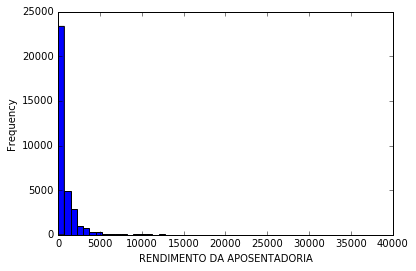

In [51]:
# Histograma da variável quantitativa RENDIMENTO DA APOSENTADORIA no Brasil

plot = info11.RAP.plot.hist(bins=faixa4)
plt.xlabel("RENDIMENTO DA APOSENTADORIA")

#### Comparação entre 2011 e 2014

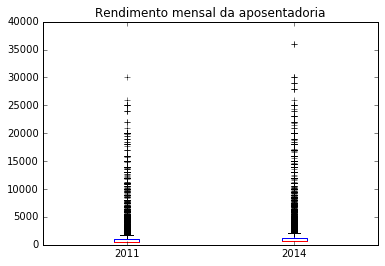

In [52]:
a1=pd.DataFrame([info11[(info11.V1252>=0)&(info11.V1252<=40000)].V1252,info14[(info14.V1252>=0)&(info14.V1252<=40000)].V1252],index=('2011','2014'))
a1=a1.T
a1.plot.box()
plt.title("Rendimento mensal da aposentadoria")

Tanto na pesquisa do IBGE, quanto no trabalho em questão, é possível verificar um aumento no rendimento da aposentadoria. Segundo o censo do IBGE de 2000 a renda cresceu, aproximadamente, 63% entre 1991 e 2000, enquanto entre 2011 e 2014 ela cresceu, aproximadamente, 25%. Com isso, pode-se concluir que a análise feita em ambas as pesquisas são coerentes com a realidade, uma vez que apresentam uma mesma tendência.

____
## 7) População ativa ou não ativa

A variável "população ativa ou não ativa" representa outra classe de indivíduos que será comparada com os "indivíduos aposentados".

#### PNAD 2014

In [62]:
info14.V4704.value_counts()
info14.PEA = info14.V4704.astype("category")
info14.PEA.cat.categories = ("Economicamente ativo", "Não economicamente ativo")

Análise univariada da variável qualitativa APOSENTADOS

In [63]:
print('Frequências relativas por APOSENTADOS:')
fpea14 = (info14.PEA.value_counts(True)*100).round(decimals=1)
print(fpea14,'\n')

Frequências relativas por APOSENTADOS:
Economicamente ativo        52.4
Não economicamente ativo    33.6
dtype: float64 



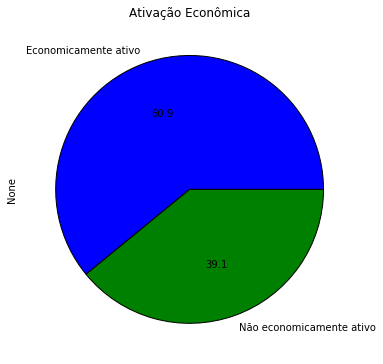

In [64]:
# Gráfico de pizza sobre a frequência relativa por APOSENTADOS

plot = fpea14.plot(kind='pie',title='Ativação Econômica',autopct='%.1f',figsize=(6, 6))

#### PNAD 2011

In [65]:
info11.V4704.value_counts()
info11.PEA = info11.V4704.astype("category")
info11.PEA.cat.categories = ("Economicamente ativo", "Não economicamente ativo")

Análise univariada da variável qualitativa APOSENTADOS

In [66]:
print('Frequências relativas por APOSENTADOS:')
fpea11 = (info11.PEA.value_counts(True)*100).round(decimals=1)
print(fpea11,'\n')

Frequências relativas por APOSENTADOS:
Economicamente ativo        51.1
Não economicamente ativo    34.1
dtype: float64 



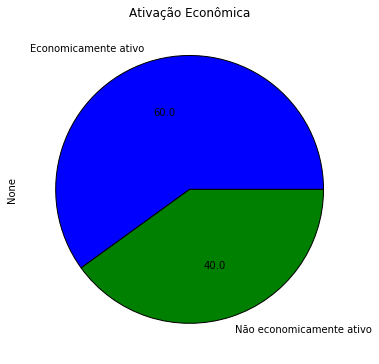

In [67]:
# Gráfico de pizza sobre a frequência relativa por APOSENTADOS

plot = fpea11.plot(kind='pie',title='Ativação Econômica',autopct='%.1f',figsize=(6, 6))

A partir dos gráficos pizza dos anos de 2011 e 2014 é possível afirmar que a maior parte da população, com 10 anos ou mais, está economicamente ativ. Além disso, percebe-se que a PEA está crescendo, visto que de 2011 para 2014 ela cresceu em 0,9%.

____
## 8) Rendimento mensal da População Economicamente Ativa (PEA)

A variável "rendimento mensal da PEA" será utilizada para comparar a renda adquirida pela classe "PEA" com a dos indivíduos aposentados.

#### PNAD 2014

In [205]:
# Definindo a variável quantitativa RENDIMENTO MENSAL

info14.V4720.value_counts()
info14.RM = info14[(info14.V4720!=999999999999)&(~info14.V4720.isnull())].V4720.astype("float")
info14_RM = info14[(info14.V4720!=999999999999)&(~info14.V4720.isnull())]

In [69]:
# Descrição da variável quantitativa RENDIMENTO MENSAL

info14.RM.describe()

count    306756.000000
mean       1183.073270
std        2382.461924
min           0.000000
25%           0.000000
50%         724.000000
75%        1350.000000
max      331200.000000
Name: V4720, dtype: float64

In [70]:
# Criação da faixa da variável quantitativa RENDIMENTO MENSAL

faixa7 = np.arange(0,40000,750)
#var7 = pd.cut(info14.RM,faixa7)
#var7.value_counts()

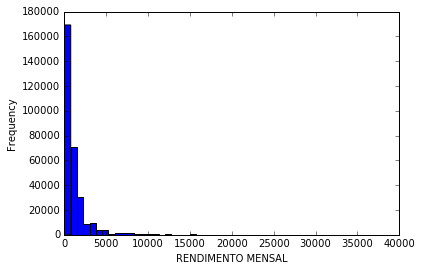

In [71]:
# Histograma da variável quantitativa RENDIMENTO MENSAL no Brasil

plot = info14.RM.plot.hist(bins=faixa7)
plt.xlabel("RENDIMENTO MENSAL")

#### PNAD 2011

In [204]:
# Definindo a variável quantitativa RENDIMENTO MENSAL

info11.V4720.value_counts()
info11.RM = info11[(info11.V4720<=500000)&(~info11.V4720.isnull())].V4720.astype("float")
info11_RM = info11[(info11.V4720<=500000)&(~info11.V4720.isnull())]

In [73]:
# Descrição da variável quantitativa RENDIMENTO MENSAL

info11.RM.describe()

count    298199.000000
mean        871.823742
std        1885.465162
min           0.000000
25%           0.000000
50%         545.000000
75%        1000.000000
max      210000.000000
Name: V4720, dtype: float64

In [74]:
# Criação da faixa da variável quantitativa RENDIMENTO MENSAL

faixa8 = np.arange(0,40000,750)
#var8 = pd.cut(info11.RM,faixa8)
#var8.value_counts()

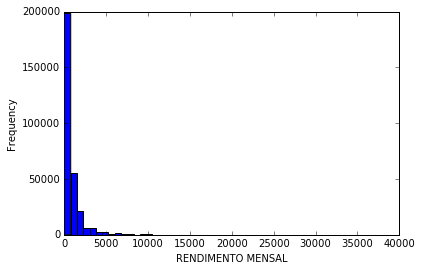

In [75]:
# Histograma da variável quantitativa RENDIMENTO MENSAL no Brasil

plot = info11.RM.plot.hist(bins=faixa8)
plt.xlabel("RENDIMENTO MENSAL")

#### Comparação entre 2011 e 2014

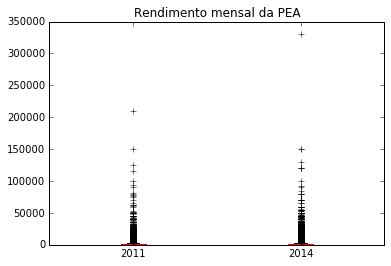

In [76]:
a3=pd.DataFrame([info11[(info11.V4720>=0)&(info11.V4720<=400000)].V4720,info14[(info14.V4720>=0)&(info14.V4720<=400000)].V4720],index=('2011','2014'))
a3=a3.T
a3.plot.box()
plt.title("Rendimento mensal da PEA")

A renda mensal da população economicamente ativa tem crescido muito nos anos passados. Segundo os gráficos acima, perceb-se que a renda média tem crescido, aproximadamente, em 36% de 2011 para 2014. Segundo a pesquisa do IBGE a renda da aposentadoria estava crescendo num ritmo maior do que a renda da PEA, com isso a tese de que a renda da aposentadoria cresceria mais do que da PEA pode ser negada pelas análises acima, uma vez que entre 2011 e 2014 a renda da aposentadoria cresceu em 25%.

____
# Análise de variáveis cruzadas

____
## 1) Aposentados por Região

#### PNAD 2014

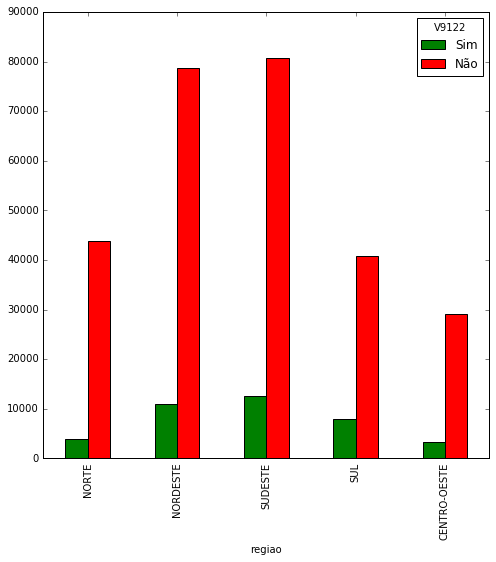

In [77]:
ap_reg = pd.crosstab(r14.regiao, info14.AP)
ap_reg.plot.bar(color=("green","red"),figsize=(8,8))

#### PNAD 2011

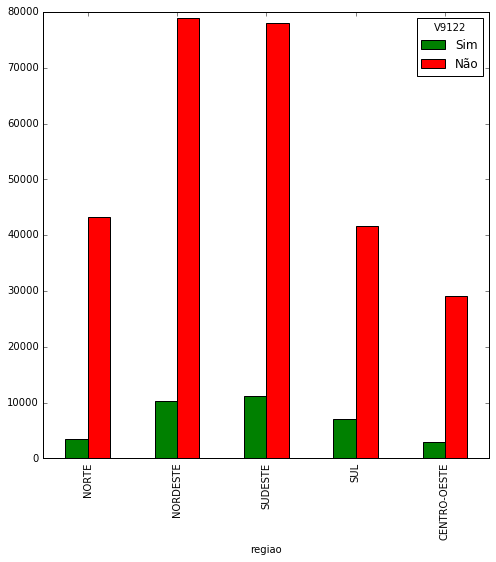

In [78]:
ap_reg2 = pd.crosstab(r11.regiao, info11.AP)
ap_reg2.plot.bar(color=("green","red"),figsize=(8,8))

Segundo a pesquisa do IBGE a população de aposentados é maior em áreas urbanas. Essa análise pode ser verificada nos gráficos acima, visto que em regiões mais urbanizadas como Nordeste, Sudeste e Sul apresentam um contingente de aposentados muito maior. A pesquisa do IBGE, porém, justifica esse maior número pela menor taxa de mortalidade de idosos nessas regiões, enquanto os gráficos acima mostram que a população dessas regiões são muito maiores e, por isso, pode-se justificar o maior número de aposentados. Vale lembrar que uma justificativa não exclui a outra.

____
## 2) População Economicamente Ativa (PEA) por Região

#### PNAD 2014

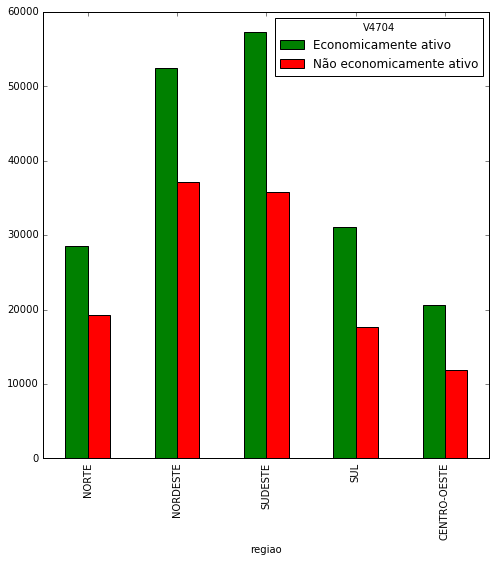

In [81]:
pea_reg = pd.crosstab(r14.regiao, info14.PEA)
pea_reg.plot.bar(color=("green","red"),figsize=(8,8))

#### PNAD 2011

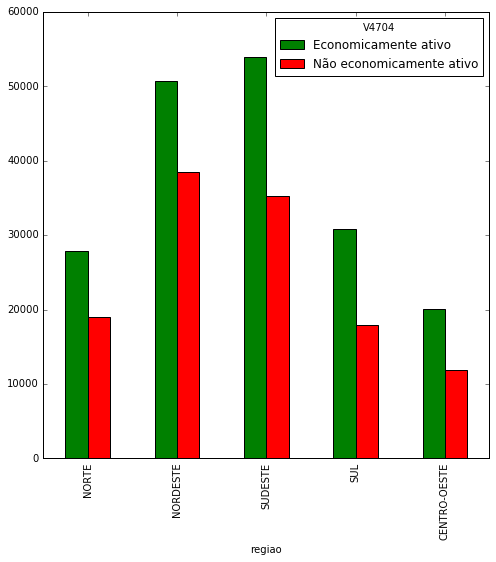

In [82]:
pea_reg2 = pd.crosstab(r11.regiao, info11.PEA)
pea_reg2.plot.bar(color=("green","red"),figsize=(8,8))

Assim com foi demonstrado no item anterior a PEA é relativamente maior a população não economicamente ativa nas regiões mais urbanizadas, visto os gráficos acima que demonstram um claro crescimento nas regiões nordeste, sudeste e sul da PEA maior do que nas regiões norte e centro-oeste entre 2011 e 2014.

____
## 3) Aposentados por Sexo

#### PNAD 2014

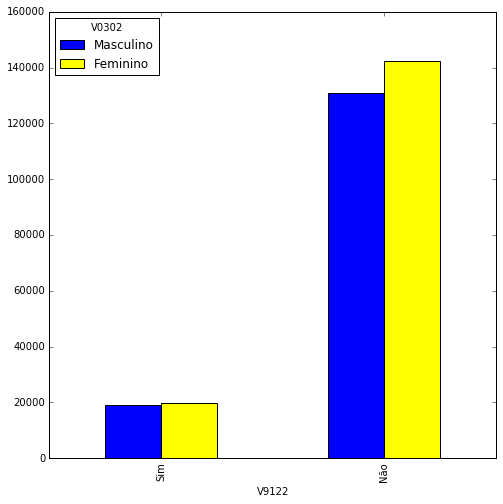

In [83]:
ap_sexo = pd.crosstab(info14.AP, info14.SEXO)
ap_sexo.plot.bar(color=("blue", "yellow"),figsize=(8,8))

#### PNAD 2011

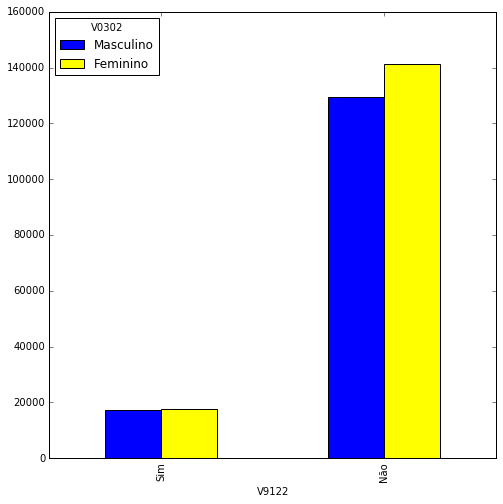

In [171]:
ap_sexo2 = pd.crosstab(info11.AP, info11.SEXO)
ap_sexo2.plot.bar(color=("blue", "yellow"),figsize=(8,8))

Segundo a pesquisa do IBGE a maior parte da população de aposentados é representado pelo sexo feminino, isso é comprovado pelos gráficos acima que demonstram um maior número de aposentados femininos do que masculinos, tanto em 2011, quanto em 2014. Em 2000 as mulheres representavam por volta de 64% da população de idosos, atualmente elas representam um pouco mais de 51%.

____
## 4) População Economicamente Ativa por Sexo

#### PNAD 2014

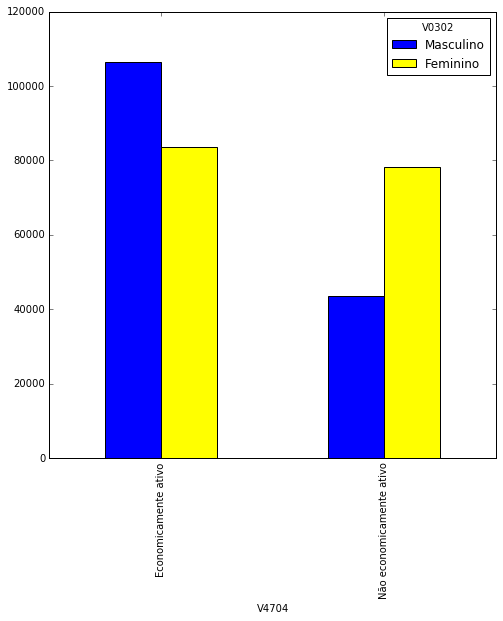

In [87]:
pea_sexo = pd.crosstab(info14.PEA, info14.SEXO)
pea_sexo.plot.bar(color=("blue", "yellow"),figsize=(8,8))

#### PNAD 2011

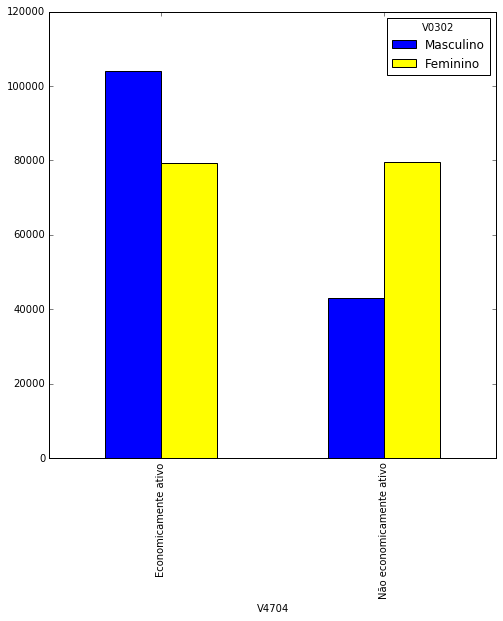

In [88]:
pea_sexo2 = pd.crosstab(info11.PEA, info11.SEXO)
pea_sexo2.plot.bar(color=("blue", "yellow"),figsize=(8,8))

Diferente da população de aposentados por sexo, a PEA apresenta um número muito maior de homens do que mulheres, enquanto a população não economicamente ativa tinha uma maioria de mulheres. Apesar disso, essa diferença na PEA vem se reduzindo, visto a comparação entre 2011 e 2014, em que o número de mulheres na PEA sofreu um aumento maior do que o número de homens..

____
## 5) Aposentados por Estado Civil

#### PNAD 2014

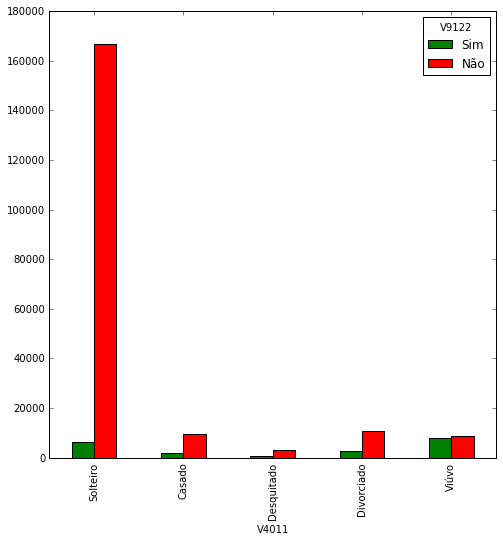

In [89]:
ap_EC = pd.crosstab(info14.EC, info14.AP)
ap_EC.plot.bar(color=("green", "red"),figsize=(8,8))

#### PNAD 2011

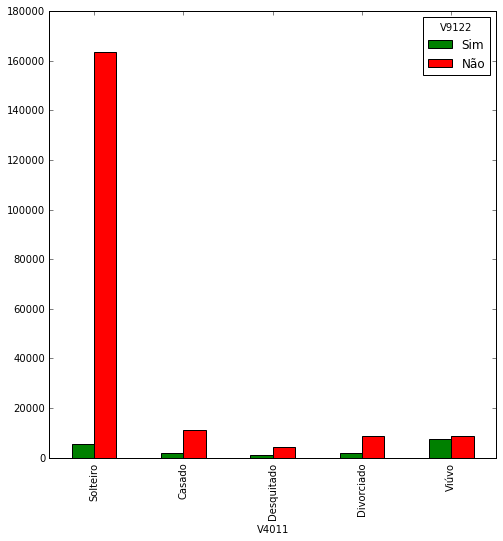

In [90]:
ap_EC2 = pd.crosstab(info11.EC, info11.AP)
ap_EC2.plot.bar(color=("green", "red"),figsize=(8,8))

As maiores parcelas de aposentados se encontram viúvos ou solteiros, porém relativamente o estado civil que apresentava maior porcentagem de aposentados era o estado "viúvo", enquanto o estado que apresenta a menor porcentagem era o de solteiro.

____
## 6) População Economicamente Ativa por Estado Civil

#### PNAD 2014

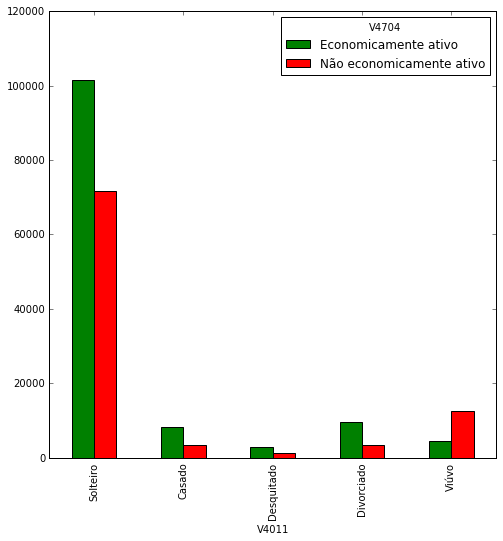

In [93]:
pea_EC = pd.crosstab(info14.EC, info14.PEA)
pea_EC.plot.bar(color=("green", "red"),figsize=(8,8))

#### PNAD 2011

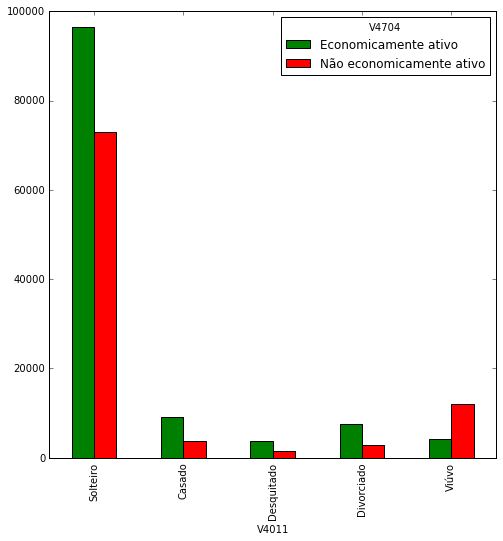

In [94]:
pea_EC2 = pd.crosstab(info11.EC, info11.PEA)
pea_EC2.plot.bar(color=("green", "red"),figsize=(8,8))

Diferente dos gráficos de aposentados por estado civil a PEA apresenta uma grande maioria de indivíduos ativos solteiros. Apesar das quantidades de indivíduos ativos ser menor nas outras categorias elas continuam sendo a maioria em todas, com exceção do estado "viúvo".

____
## 7) Idade por Aposentados

#### PNAD 2014

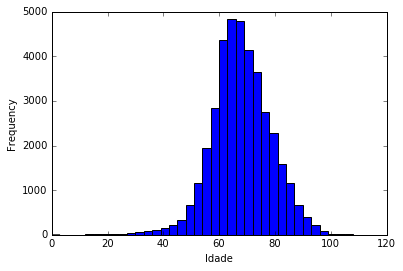

In [95]:
# Indivíduos Apoesentados

plot = info14[info14.AP=="Sim"].V8005.plot.hist(bins=faixa1)
plt.xlabel("Idade")

#### PNAD 2011

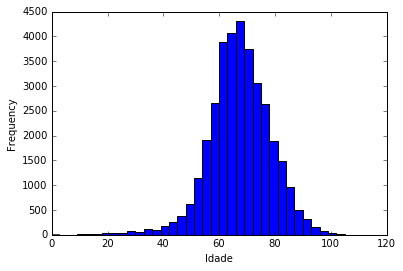

In [96]:
# Indivíduos Aposentados

plot = info11[info11.AP=="Sim"].V8005.plot.hist(bins=faixa2)
plt.xlabel("Idade")

#### Comparação entre 2011 e 2014

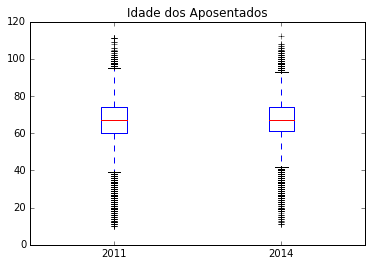

In [97]:
a4=pd.DataFrame([info11[info11.AP=="Sim"].V8005,info14[info14.AP=="Sim"].V8005],index=('2011','2014'))
a4=a4.T
a4.plot.box()
plt.title("Idade dos Aposentados")

Segundo a pesquisa do IBGE de 2000 a maior parte da população de apoesentados se concentra na faixa de 60 anos ou mais (na época essa faixa representava por volta de 8,6%). A partir dos gráficos construídos acima percebe-se que essa tendência ainda se mantém, visto que tanto em 2011, quanto em 2014, a maior parte da população se concentra acima dos 60 anos.

____
## 8) População Economicamente Ativa por Idade

#### PNAD 2014

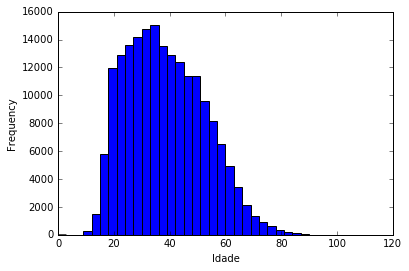

In [101]:
# Economicamente ativo

plot = info14[info14.PEA=="Economicamente ativo"].V8005.plot.hist(bins=faixa1)
plt.xlabel("Idade")

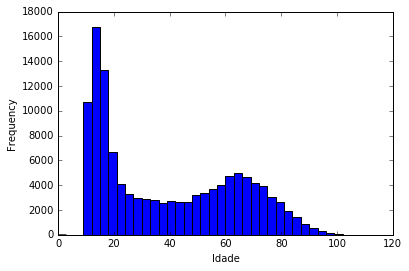

In [102]:
# Não economicamente ativo

plot = info14[info14.PEA=="Não economicamente ativo"].V8005.plot.hist(bins=faixa1)
plt.xlabel("Idade")

#### Comparação entre a PEA e população não economicamente ativa de 2014

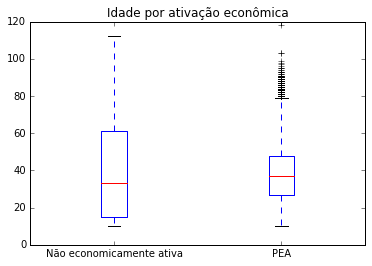

In [103]:
a6=pd.DataFrame([info14[info14.PEA=="Não economicamente ativo"].V8005,info14[info14.PEA=="Economicamente ativo"].V8005],index=('Não economicamente ativa','PEA'))
a6=a6.T
a6.plot.box()
plt.title("Idade por ativação econômica")

#### PNAD 2011

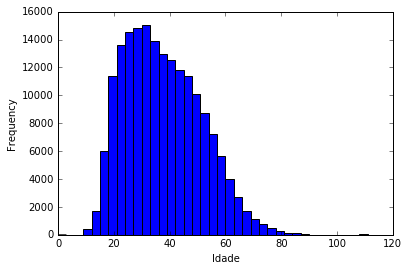

In [104]:
# Economicamente ativo

plot = info11[info11.PEA=="Economicamente ativo"].V8005.plot.hist(bins=faixa2)
plt.xlabel("Idade")

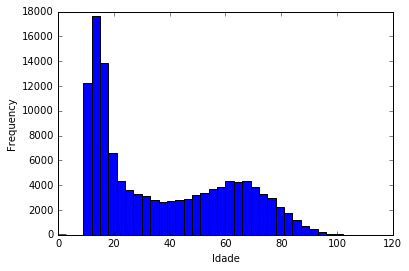

In [105]:
# Não economicamente ativo

plot = info11[info11.PEA=="Não economicamente ativo"].V8005.plot.hist(bins=faixa2)
plt.xlabel("Idade")

#### Comparação entre a PEA e população não economicamente ativa de 2011

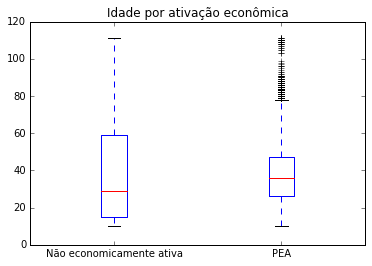

In [106]:
a7=pd.DataFrame([info11[info11.PEA=="Não economicamente ativo"].V8005,info11[info11.PEA=="Economicamente ativo"].V8005],index=('Não economicamente ativa','PEA'))
a7=a7.T
a7.plot.box()
plt.title("Idade por ativação econômica")

#### Comparação entre a PEA de 2011 e 2014

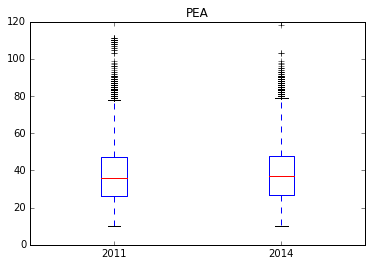

In [107]:
a8=pd.DataFrame([info11[info11.PEA=="Economicamente ativo"].V8005,info14[info14.PEA=="Economicamente ativo"].V8005],index=('2011','2014'))
a8=a8.T
a8.plot.box()
plt.title("PEA")

#### Comparação entre a população não economicamente ativa de 2011 e 2014

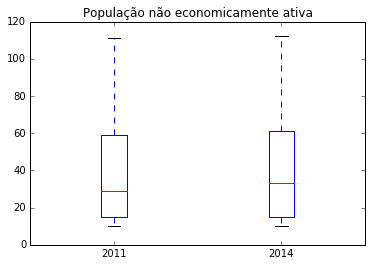

In [108]:
a9=pd.DataFrame([info11[info11.PEA=="Não economicamente ativo"].V8005,info14[info14.PEA=="Não economicamente ativo"].V8005],index=('2011','2014'))
a9=a9.T
a9.plot.box()
plt.title("População não economicamente ativa")

Assim como no gráfico da população de aposentados por idade percebe-se que a população não economicamente ativa també tem maior concentração entre as faixas de 0 a 20 e 60 anos ou mais. Enquanto a populácão economicamente ativa se concentra entre 20 e 60 anos de idade.
Além disso percebe-se que a PEA está envelhecendo, visto os boxplots que comparam as PEAs de 2011 e 2014, levando a população não economicamente ativa a aumentar, por dois motivos: maior número de filhos e envelhecimento da antiga PEA.

____
## 9) Renda da aposentadoria pelo país

#### PNAD 2014

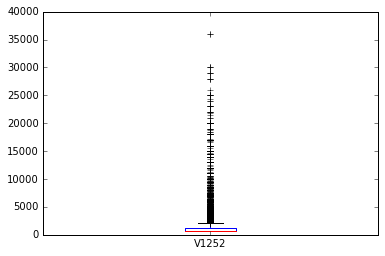

In [109]:
# Brasil

plot00 = info14.V1252[(info14.V1252>=0)&(info14.V1252<=40000)].plot.box()

#### Comparação por região do país em 2014

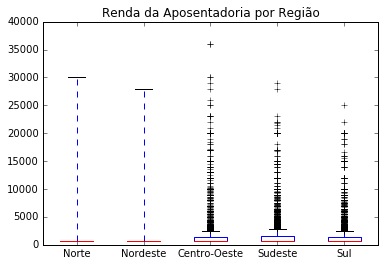

In [110]:
a10=pd.DataFrame([info14[r14.regiao=="NORTE"].V1252[(info14.V1252>=0)&(info14.V1252<=40000)],info14[r14.regiao=="NORDESTE"].V1252[(info14.V1252>=0)&(info14.V1252<=40000)],info14[r14.regiao=="CENTRO-OESTE"].V1252[(info14.V1252>=0)&(info14.V1252<=40000)],info14[r14.regiao=="SUDESTE"].V1252[(info14.V1252>=0)&(info14.V1252<=40000)],info14[r14.regiao=="SUL"].V1252[(info14.V1252>=0)&(info14.V1252<=40000)]],index=('Norte','Nordeste','Centro-Oeste','Sudeste','Sul'))
a10=a10.T
a10.plot.box()
plt.title("Renda da Aposentadoria por Região")

#### PNAD 2011

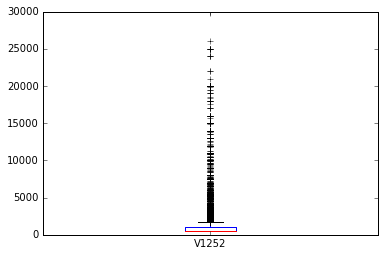

In [111]:
# Brasil

plot10 = info11.V1252[(info11.V1252>=0)&(info11.V1252<=40000)].plot.box()

#### Comparação por região do país em 2011

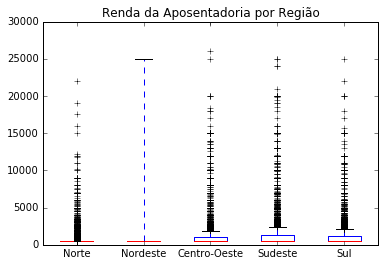

In [112]:
a11=pd.DataFrame([info11[r11.regiao=="NORTE"].V1252[(info11.V1252>=0)&(info11.V1252<=40000)],info11[r11.regiao=="NORDESTE"].V1252[(info11.V1252>=0)&(info11.V1252<=40000)],info11[r11.regiao=="CENTRO-OESTE"].V1252[(info11.V1252>=0)&(info11.V1252<=40000)],info11[r11.regiao=="SUDESTE"].V1252[(info11.V1252>=0)&(info11.V1252<=40000)],info11[r11.regiao=="SUL"].V1252[(info11.V1252>=0)&(info11.V1252<=40000)]],index=('Norte','Nordeste','Centro-Oeste','Sudeste','Sul'))
a11=a11.T
a11.plot.box()
plt.title("Renda da Aposentadoria por Região")

Segundo a pesquisa do IBGE a renda dos aposentados tem a tendência de ser maior em regiões mais urbanizadas, que no caso seriam: Nordeste, sudeste e sul. Segundo os gráficos acima percebe-se que tanto em 2011, quanto em 2014, essa tendência continua a ser visualizada.

____
## 10) Renda da População Economicamente Ativa (PEA) pelo país

#### PNAD 2014

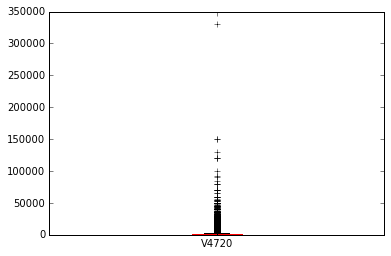

In [117]:
# Brasil

plot10 = info14.V4720[(info14.V4720>=0)&(info14.V4720<=400000)].plot.box()

#### Comparação por região em 2014

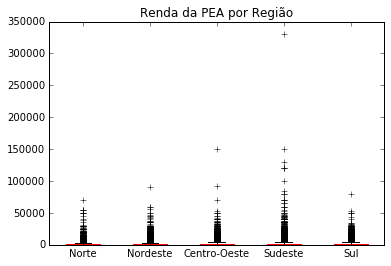

In [118]:
a14=pd.DataFrame([info14[r14.regiao=="NORTE"].V4720[(info14.V4720>=0)&(info14.V4720<=400000)],info14[r14.regiao=="NORDESTE"].V4720[(info14.V4720>=0)&(info14.V4720<=400000)],info14[r14.regiao=="CENTRO-OESTE"].V4720[(info14.V4720>=0)&(info14.V4720<=400000)],info14[r14.regiao=="SUDESTE"].V4720[(info14.V4720>=0)&(info14.V4720<=400000)],info14[r14.regiao=="SUL"].V4720[(info14.V4720>=0)&(info14.V4720<=400000)]],index=('Norte','Nordeste','Centro-Oeste','Sudeste','Sul'))
a14=a14.T
a14.plot.box()
plt.title("Renda da PEA por Região")

#### PNAD 2011

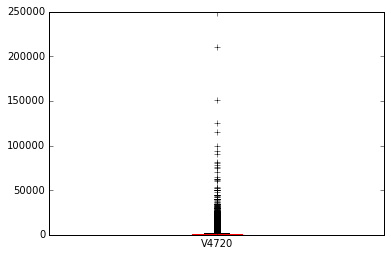

In [119]:
# Brasil

plot10 = info11.V4720[(info11.V4720>=0)&(info11.V4720<=400000)].plot.box()

#### Comparação por região em 2011

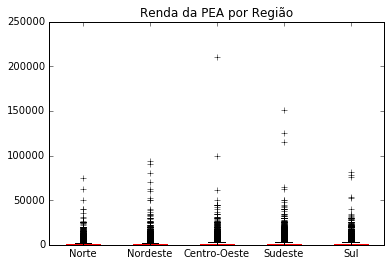

In [120]:
a15=pd.DataFrame([info11[r11.regiao=="NORTE"].V4720[(info11.V4720>=0)&(info11.V4720<=400000)],info11[r11.regiao=="NORDESTE"].V4720[(info11.V4720>=0)&(info11.V4720<=400000)],info11[r11.regiao=="CENTRO-OESTE"].V4720[(info11.V4720>=0)&(info11.V4720<=400000)],info11[r11.regiao=="SUDESTE"].V4720[(info11.V4720>=0)&(info11.V4720<=400000)],info11[r11.regiao=="SUL"].V4720[(info11.V4720>=0)&(info11.V4720<=400000)]],index=('Norte','Nordeste','Centro-Oeste','Sudeste','Sul'))
a15=a15.T
a15.plot.box()
plt.title("Renda da PEA por Região")

O mesmo se dá para os gráficos de renda da PEA por  região, uma vez que a renda média é maior em áreas urbanas do que em rurais, apesar das áreas rurais apresentarem algumas excessões.

____
# Gráficos de disperção de pontos

____
## 1) Renda da PEA por Idade

#### PNAD 2014

Coeficiente angular a:  26.1731148754
Coeficiente linear b:  184.296111008


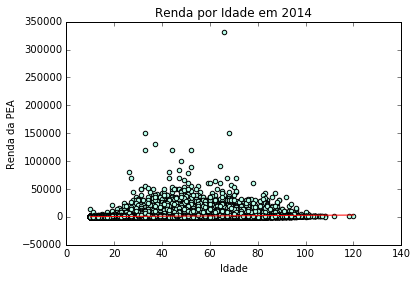

In [216]:
def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color=("#B8FFEA"))

    import matplotlib.pyplot as plt
    plt.plot((dataframe[column1].min(), dataframe[column1].max()), (a * dataframe[column1].min() + b, a * dataframe[column1].max() + b), color='red')
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)
    
    
scatter_and_line(info14_RM,"V8005","V4720")
plt.title("Renda por Idade em 2014")
plt.xlabel("Idade")
plt.ylabel("Renda da PEA")

#### PNAD 2011

Coeficiente angular a:  21.0002791005
Coeficiente linear b:  97.6396593671


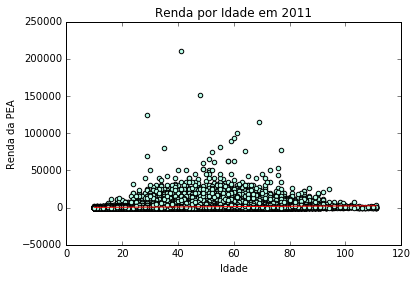

In [215]:
def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color=("#B8FFEA"))

    import matplotlib.pyplot as plt
    plt.plot((dataframe[column1].min(), dataframe[column1].max()), (a * dataframe[column1].min() + b, a * dataframe[column1].max() + b), color='red')
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)
    
    
scatter_and_line(info11_RM,"V8005","V4720")
plt.title("Renda por Idade em 2011")
plt.xlabel("Idade")
plt.ylabel("Renda da PEA")

____
## 2) Renda da aposentadoria por Idade

#### PNAD 2014

Coeficiente angular a:  -7.33095774683
Coeficiente linear b:  1862.33122955


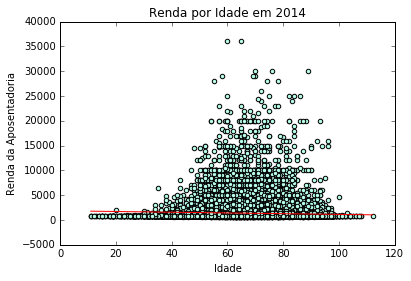

In [217]:
def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color=("#B8FFEA"))

    import matplotlib.pyplot as plt
    plt.plot((dataframe[column1].min(), dataframe[column1].max()), (a * dataframe[column1].min() + b, a * dataframe[column1].max() + b), color='red')
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)
    
    
scatter_and_line(info14_RAP,"V8005","V1252")
plt.title("Renda por Idade em 2014")
plt.xlabel("Idade")
plt.ylabel("Renda da Aposentadoria")

#### PNAD 2011

Coeficiente angular a:  -6.55716686619
Coeficiente linear b:  1528.9551864


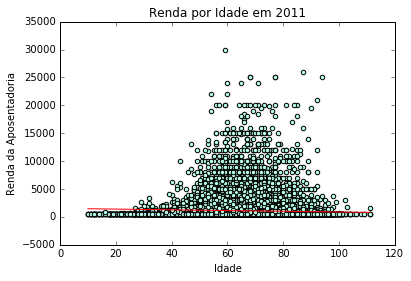

In [218]:
def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color=("#B8FFEA"))

    import matplotlib.pyplot as plt
    plt.plot((dataframe[column1].min(), dataframe[column1].max()), (a * dataframe[column1].min() + b, a * dataframe[column1].max() + b), color='red')
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)
    
    
scatter_and_line(info11_RAP,"V8005","V1252")
plt.title("Renda por Idade em 2011")
plt.xlabel("Idade")
plt.ylabel("Renda da Aposentadoria")

___
## Conclusão 

O projeto teve como objetivo analisar a classe de aposentados e a classe da PEA em diversos panoramas, envolvendo variáveis quantitativas (renda da PEA, renda da aposentadoria e idade) e qualitativas (sexo, estado civil e unidade de federação). Após a conclusão do trabalho pode-se afirmar que a população de aposentados, assim como a PEA, está crescendo, porém aquela está crescendo mais do que está. Além disso foi visualizado que a maioria da população de aposentados é de mulheres, enquanto a maioria da PEA é de homens, porém pode-se afirmar que tanto o número de mulheres aposentadas, quanto o número de mulheres ecnonomicamente ativas, vem aumentando nos últimos anos, visto os dados das PNAD de 2011 e 2014. Outro ponto que foi analisado foi o de que a maior parte dos aposentados ja esteve ou ainda está em alguma relação interpessoal, enquanto a maioria da PEA está solteiro. Em relação a variável unidade de federação percebe-se que tanto a população de aposentados, quanto a de PEA, apresenta um maior número de indivíduos em áreas mais urbanizadas.

Em relação a variáveis quantitativas pode-se afirmar que a população de aposentados apresenta uma renda média menor do que da PEA e que ambas as rendas são maiores em regiões mais urbanizadas. Além disso percebe-se que a tendência é de que quanto maior a idade do aposentado menor a sua renda, enquanto a tendência da renda da PEA aumenta de forma proporcional a idade. Percebe-se também que a população de aposentados se concentra na faixa de idade com 60 anos ou mais, enquanto a PEA se concentra naa faixa de 20 a 60 anos.

Com a análise dos dados calculados e com os gráficos construídos pode-se dizer que ambas as pesquisas estão de acordo apesar de algumas tendências estarem diferentes devido a diferença temporal entre as pesquisas. O trabalho acima pode ser utilizado para calcular estimativas em relação às diversas categorias de aposentados e PEA, assim como a relação futura entre as duas. A principal análise que poderia ser feita em relação ao comportamento das duas populações juntas é em função do crescimento mais acelerado do número de aposentados e menos acelerado da PEA, que resultará numa dificuldade econômica para o Estado que poderia ter uma arrecadação menor sobre a PEA e um gasto maior com a aposentadoria num futuro relativamente próximo.